## **Building Model**

### **1. Splitting data for trainning (90%) and testing (10%)**

In [ ]:
#input features for model
X = data_encoded.drop(['Price'], axis=1)
#output features for model
y = data_encoded['Price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=21)

### **2. Scaling numerical features**

> **Feature Scaling** là một kỹ thuật tiền xử lý dữ liệu liên quan đến việc chuyển đổi giá trị của các features trong dataset sang tỷ lệ tương tự nhau để đảm bảo rằng tất cả các features đóng góp cho mô hình là như nhau, hạn chế over-fitting.



A value is normalized as MinMaxScaler:

${x_{scale}}$=$\frac{x - x_{min}}{x_{max} - x_{min}}$

Bằng cách đó, tất cả các đối tượng sẽ nằm trong phạm vi $[0,1]$ có nghĩa là giá trị tối thiểu và tối đa của một biến sẽ lần lượt là 0 và 1.

In [ ]:
cols_scal = ['Acreage','TotalBedroom','TotalBathroom','TotalFloor','OuterUtilities','HouseUtilities','HouseMinusPoint',	'RoomMultipurpose','Longitude','Latitude']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
X_train[cols_scal]=trans.fit_transform(X_train[cols_scal])
X_test[cols_scal] = trans.transform(X_test[cols_scal])

In [ ]:
X_train

,Datetime_0,Datetime_1,Acreage,TotalFloor,TotalBedroom,TotalBathroom,HouseUtilities,HouseMinusPoint,RoomMultipurpose,OuterUtilities,HouseType_0,HouseType_1,HouseType_2,Longitude,Latitude
7028,1,0,0.007869,0.172414,0.030303,0.030303,0.173913,0.0,0.1,0.071429,0,0,1,0.694096,0.126221
7661,1,0,0.007040,0.000000,0.050505,0.060606,0.086957,0.0,0.2,0.107143,0,0,1,0.611306,0.875853
7968,1,0,0.007454,0.103448,0.020202,0.010101,0.217391,0.0,0.0,0.178571,0,0,1,0.700216,0.114616
4953,0,1,0.010215,0.103448,0.020202,0.010101,0.000000,0.0,0.1,0.142857,0,0,1,0.701461,0.123676
4187,0,1,0.001933,0.068966,0.020202,0.010101,0.043478,0.0,0.1,0.178571,0,0,1,0.708194,0.121883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6844,1,0,0.004694,0.034483,0.010101,0.010101,0.130435,0.0,0.1,0.107143,0,0,1,0.702296,0.117877
48,0,1,0.002899,0.000000,0.000000,0.010101,0.086957,0.0,0.0,0.178571,0,1,0,0.702840,0.120632
8964,1,0,0.005384,0.000000,0.030303,0.030303,0.043478,0.0,0.2,0.142857,0,1,0,0.608822,0.880427
5944,1,0,0.019879,0.586207,0.252525,0.292929,0.086957,0.0,0.0,0.250000,0,1,0,0.606338,0.877201


### **3. Linear Regression**

Hồi quy tuyến tính là một phương pháp thống kê để mô hình hóa mối quan hệ giữa một biến phụ thuộc (thường được ký hiệu là "y") và một hoặc nhiều biến độc lập (thường được ký hiệu là "x").

Nhằm mục đích tìm đường phù hợp nhất xấp xỉ mối quan hệ giữa biến phụ thuộc $y$ và biến độc lập $x$.

Giả định rằng có một mối quan hệ tuyến tính giữa biến phụ thuộc và biến độc lập, nghĩa là y có thể được biểu thị dưới dạng tổ hợp tuyến tính của các biến độc lập x cộng với một số hạng sai số:

$y = β_1x_1 + β_2x_2 + ... + β_nx_n + β_0 + \varepsilon$

Trong đó:
* $β_0$ là số hạng chặn
* $β_1, β_2, ... , β_n$ là các hệ số của các biến độc lập $x_1, x_2, ..., x_n$
* $\varepsilon$ là số hạng sai số.

Mục tiêu là ước tính giá trị của các hệ số sao cho chúng giảm thiểu tổng bình phương chênh lệch giữa giá trị dự đoán và giá trị quan sát của biến phụ thuộc. Đây được gọi là phương pháp bình phương nhỏ nhất.

Các ước tính cho các hệ số ($\hat{β}$) có thể được tính bằng công thức sau:

$\hat{β} = (X^T.X)^{-1}. X^T.Y$

Trong đó:
* $X$ là ma trận của các biến độc lập
* $Y$ là vectơ của các giá trị được quan sát của biến phụ thuộc

Khi các hệ số đã được ước tính, giá trị dự đoán của biến phụ thuộc cho đầu vào mới có thể được tính bằng công thức:

$\hat{y} =  β_1x_1 + β_2x_2 + ... + β_nx_n + β_0$ ,

trong đó $x_1, x_2, ..., x_n$ là giá trị của các biến độc lập cho đầu vào mới.

In [ ]:
X_train_1 = X_train.copy()
X_test_1 = X_test.copy()
y_train_1 = y_train.copy()
y_test_1 = y_test.copy()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
lr = LinearRegression()

In [ ]:
lr.fit(X_train_1, y_train_1)

LinearRegression()

In [ ]:
print('R2 score of train data: ', lr.score(X_train_1, y_train_1))
print('R2 score of test data: ', lr.score(X_test_1, y_test_1))

R2 score of train data:  0.43879166014191073
R2 score of test data:  0.459484292533053


In [ ]:
print('MAE of train data: ', mean_absolute_error(lr.predict(X_train_1), y_train_1))
print('MAE of test data: ', mean_absolute_error(lr.predict(X_test_1), y_test_1))

MAE of train data:  4.21526100833457
MAE of test data:  4.080861636971047


In [ ]:
print('MSE of train data: ', mean_squared_error(lr.predict(X_train_1), y_train_1))
print('MSE of test data: ', mean_squared_error(lr.predict(X_test_1), y_test_1))

MSE of train data:  132.04394450893486
MSE of test data:  126.42292846429567


### **Decision Tree**

Decision Tree là một *non-parametric supervised learning method* được sử dụng để *phân loại* và *hồi quy*. Mục tiêu của thuật toán này là tạo ra một mô hình dự đoán giá trị của biến mục tiêu dựa trên quy luật của các data features.

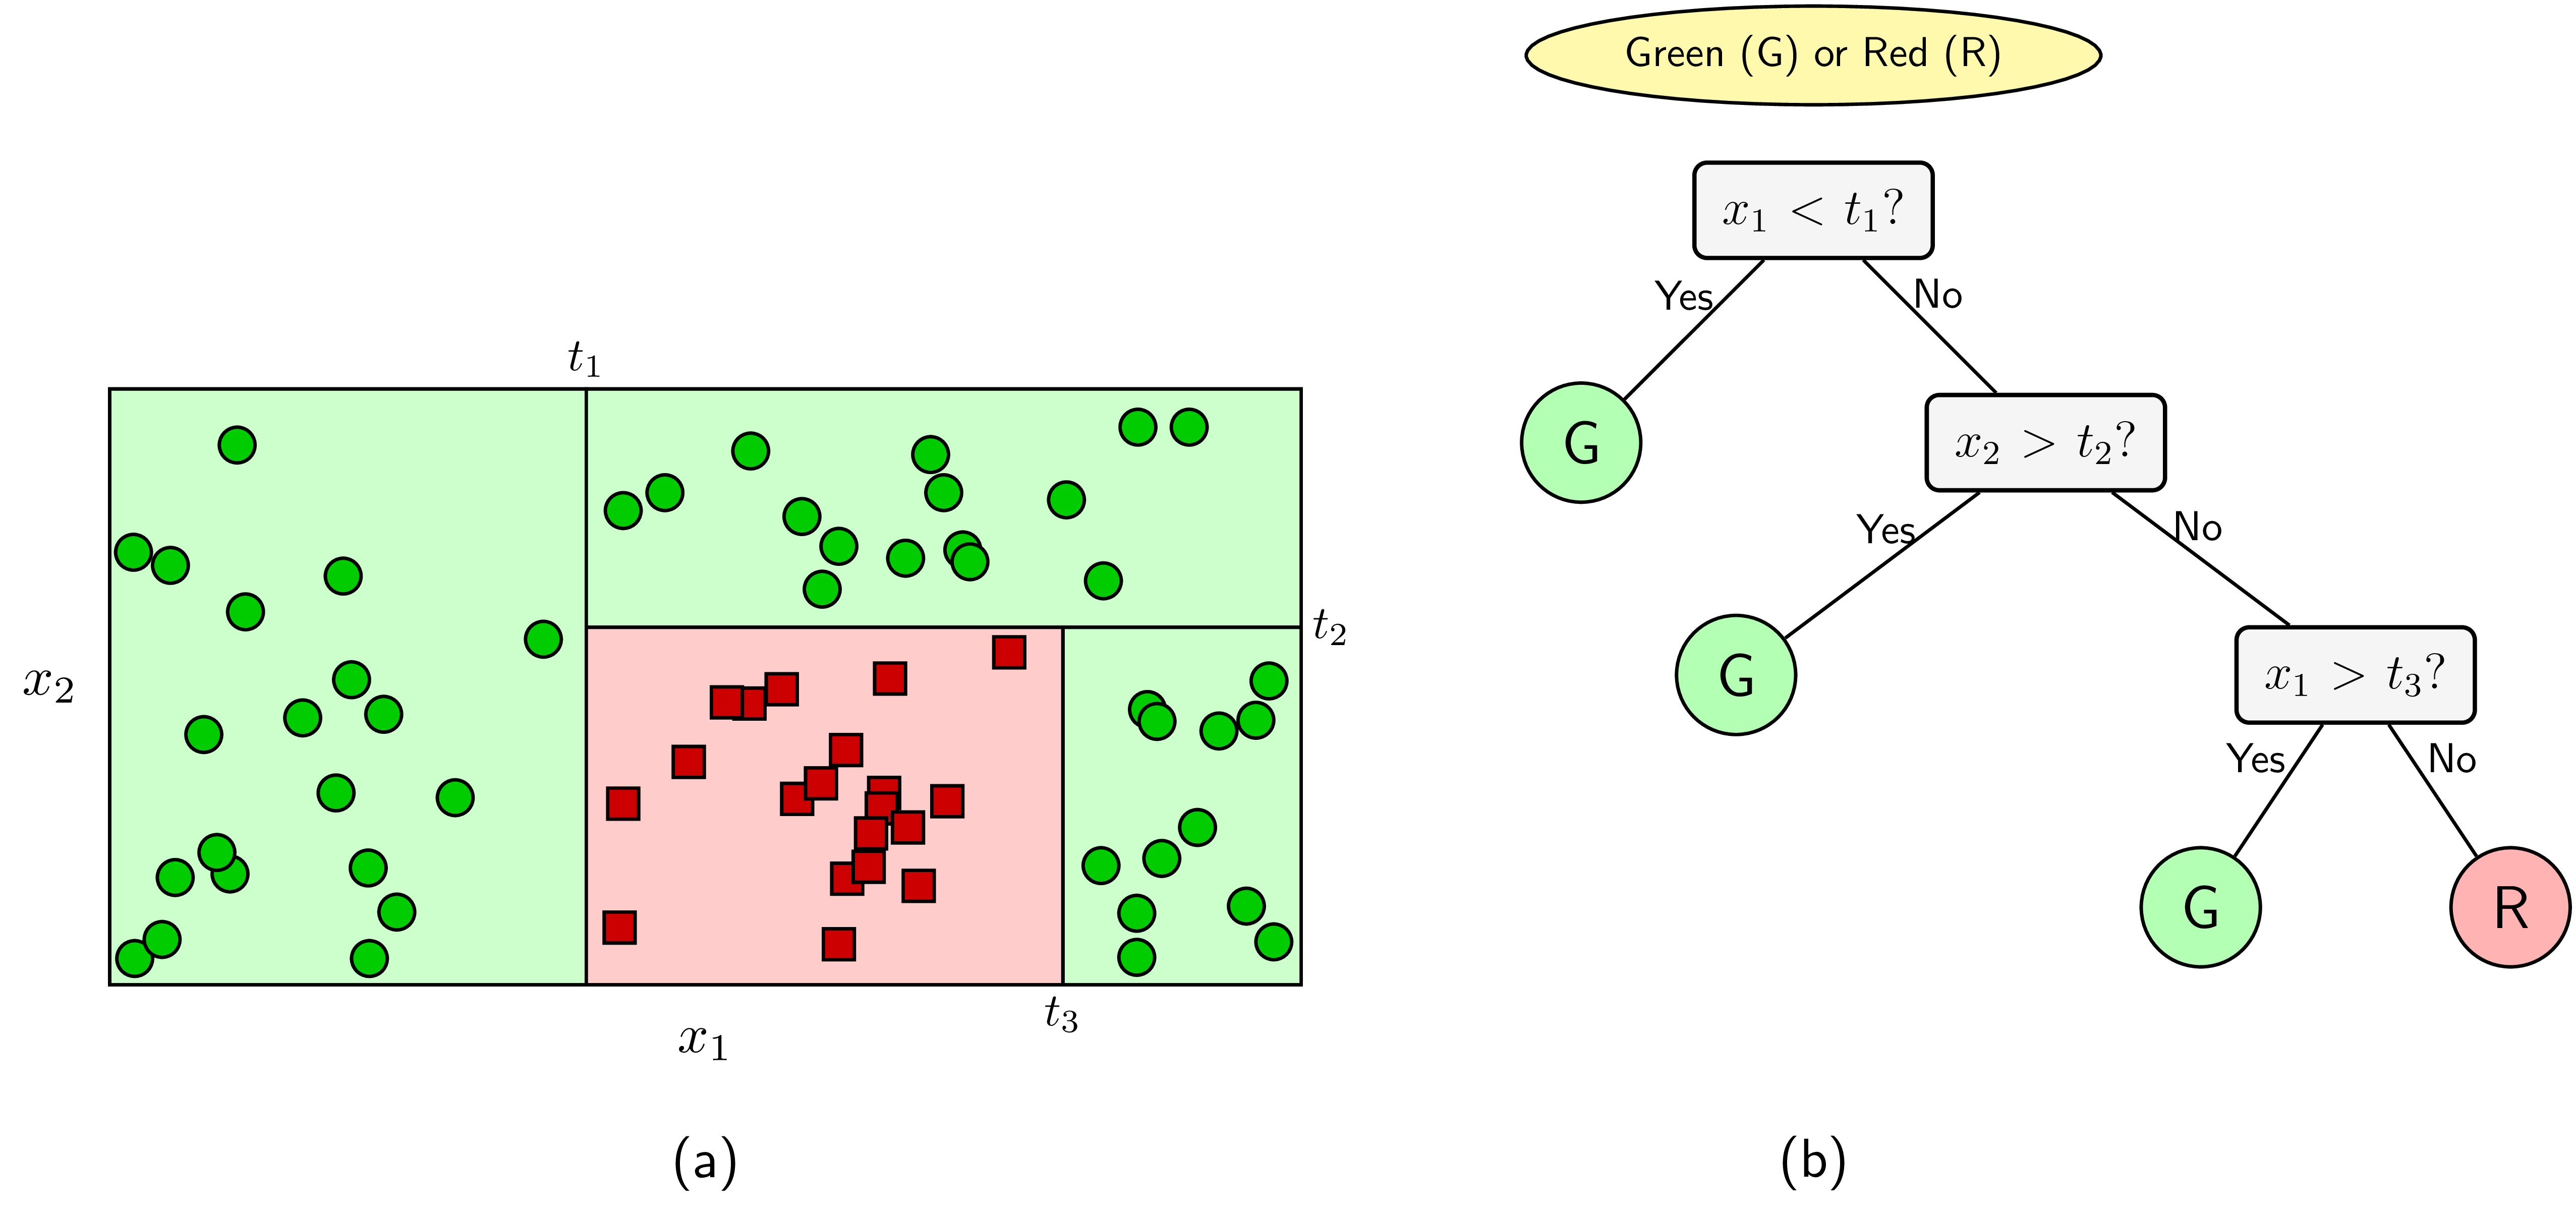

Xây dựng ***Decision Tree*** theo **ID3**

Bài toán xây dựng một decision tree bằng ID3 được chia thành những bài toán nhỏ, trong mỗi bài toán, sẽ phải tìm các cách phân chia các thuộc tính trong một non-leaf node một cách hợp lý sao cho hàm mất mát cuối cùng đạt giá trị nhỏ nhất.

Cho một phân phối xác suất của một biến rời rạc $x$ có thể nhận $n$ giá trị khác nhau $x_1,x_2,…,x_n$. Giả sử rằng xác suất để $x$ nhận các giá trị này là
$p_i = p(x = x_i)$ với $0 ≤ p_i ≤ 1$,
$∑_{i = 1}^n p_i = 1$. Ký hiệu phân phối này là $p = (p_1, p_2,...,p_n)$. Entropy của phân phối này được định nghĩa là



$H(p) = -∑_{i=1}^n p_i log_2{p_i}$



Xét một bài toán với $C$ class khác nhau. Giả sử ta đang làm việc với một non-leaf node với các điểm dữ liệu tạo thành một tập $S$ với số phần tử là
$|S| = N$. Giả sử thêm rằng trong số
$N$ điểm dữ liệu này, $N_c,c =1,2,...,C$ điểm thuộc vào class $c$. Xác suất để mỗi điểm dữ liệu rơi vào một class $c$ được xấp xỉ bằng $\frac{N_c}{N}$ (maximum likelihood estimation). Như vậy, entropy tại node này được tính bởi:

$H(S) = -\sum_{c=1}^{C}\frac{N_c}{N} log(\frac{N_c}{N})$ $(1)$

Tiếp theo, giả sử thuộc tính được chọn là $x$. Dựa trên $x$, các điểm dữ liệu trong $S$ được phân ra thành $K$ child node $S_1, S_2,..., S_k$ với số điểm trong mỗi child node lần lượt là $m_1, m_2,...,m_k$. Ta định nghĩa:

$H(x,S) = \sum_{k=1}^{K} \frac{m_k}{N} H(S_k)$ $(2)$

là tổng có trọng số entroy của mỗi child node–được tính tương tự như $(2)$. Việc lấy trọng số này là quan trọng vì các node thường có số lượng điểm khác nhau.

Tiếp theo, ta định nghĩa $information gain$ dựa trên thuộc tính $x$:

$G(x,S) = H(S) - H(x,S)$

Trong ID3, tại mỗi node, thuộc tính được chọn được xác định dựa trên:

$x^* = argmax_{x} G(x,S) = arg min_{x} H(x,S)$

tức thuộc tính khiến cho $information gain$ đạt giá trị lớn nhất.

Quá trình splitting dừng lại khi:
*   Nếu node đó có entropy bằng 0, tức mọi điểm trong node đều thuộc một class.

*   Nếu node đó có số phần tử nhỏ hơn một ngưỡng nào đó. Trong trường hợp này, ta chấp nhận có một số điểm bị phân lớp sai để tránh overfitting. Class cho leaf node này có thể được xác định dựa trên class chiếm đa số trong node.

*   Nếu khoảng cách từ node đó đến root node đạt tới một giá trị nào đó. Việc hạn chế chiều sâu của tree này làm giảm độ phức tạp của tree và phần nào giúp tránh overfitting.

*   Nếu tổng số leaf node vượt quá một ngưỡng nào đó.

*   Nếu việc phân chia node đó không làm giảm entropy quá nhiều (information gain nhỏ hơn một ngưỡng nào đó).

### **4. Random Forest**

Thuật toán Random Forest gồm nhiều Decision Tree, mỗi Decision Tree đều có những yếu tố ngẫu nhiên:
- Lấy ngẫu nhiên dữ liệu để xây dựng Decision Tree.
- Lấy ngẫu nhiên các thuộc tính để xây dựng Decision Tree.

Random Forest có 2 dạng là Random Forest Classifier và Random Forest Regression.
- **Random Forest Classifier:** mỗi Decision Tree riêng lẻ sẽ cho ra một kết quả dự doán về lớp (class) mà quan sát của trường dữ liệu đó thuộc vào. Và lớp với số lượng được dự đoán nhiều nhất sẽ là kết quả dự đoán cuối cùng của model.
- **Random Forest Regression:** kết hợp phương pháp ensemble learning với Decision Tree để tạo ra ngẫu nhiên nhiều Decisioin Tree từ bộ dữ liệu ban đầu. Sau đó, tính trung bình các kết quả thu được để đưa ra kết quả dự đoán cuối cùng của model.

Ưu điểm của Random Forest:

Trong thuật toán Decision Tree, khi xây dựng, nếu để độ sâu tùy ý thì cây sẽ phân loại đúng hết các dữ liệu trong tập training dẫn đến mô hình có thể dự đoán tệ trên tập validation/test hay nói cách khác là mô hình bị overfitting hoặc có high variance.
Random Forest sẽ khắc phục được hạn chế này, do mỗi Decision Tree trong thuật toán Random Forest không dùng tất cả dữ liệu training, cũng như không dùng tất cả các thuộc tính của dữ liệu để xây dựng cây. Khi đó, mỗi mô hình Decision Tree có thế bị underfitting, hay nói cách khác là mô hình có high bias. Tuy nhiên, kết quả cuối cùng của thuật toán Random Forest lại tổng hợp từ nhiều cây quyết định, thế nên thông tin từ các cây sẽ bổ sung cho nhau, dẫn đến mô hình có kết quả dự đoán tốt với low bias và low variance.

In [ ]:
X_train_2 = X_train.copy()
X_test_2 = X_test.copy()
y_train_2 = y_train.copy()
y_test_2 = y_test.copy()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rdfr = RandomForestRegressor()

In [ ]:
rdfr.fit(X_train_2, y_train_2)

RandomForestRegressor()

In [ ]:
print('R2 score of train data: ', rdfr.score(X_train_2, y_train_2))
print('R2 score of test data: ', rdfr.score(X_test_2, y_test_2))

R2 score of train data:  0.938085052111285
R2 score of test data:  0.7658053176109741


In [ ]:
print('MAE of train data: ', mean_absolute_error(rdfr.predict(X_train_2), y_train_2))
print('MAE of test data: ', mean_absolute_error(rdfr.predict(X_test_2), y_test_2))

MAE of train data:  1.1262188423980197
MAE of test data:  2.660321198666249


In [ ]:
print('MSE of train data: ', mean_squared_error(rdfr.predict(X_train_2), y_train_2))
print('MSE of test data: ', mean_squared_error(rdfr.predict(X_test_2), y_test_2))

MSE of train data:  14.567662956253251
MSE of test data:  54.77653501900643


### **5. XGBoost**

XGBoost *(extreme Gradient Boosting)* là một trong những thuật toán machine learning phổ biến và được sử dụng rộng rãi nhất hiện nay vì đơn giản là nó rất mạnh mẽ. Nó tương tự như Gradient Boost nhưng có một vài tính năng bổ sung:
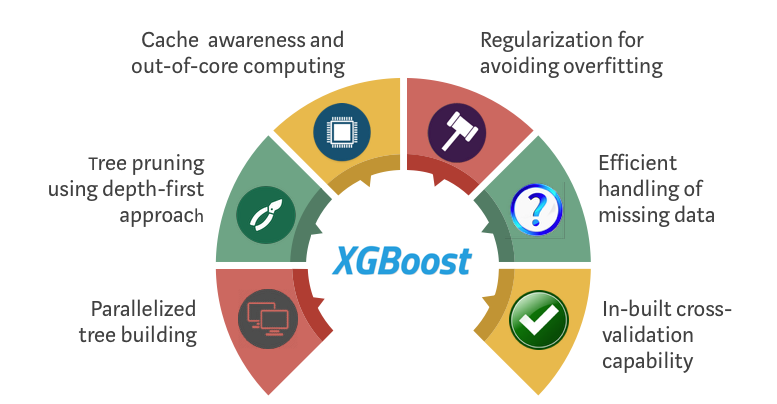





**Extreme Gradient Boosting:**

1.  Xác định giá trị dự đoán ban đầu: Tạo một dự đoán ban đầu cho tất cả các giá trị y bằng giá trị trung bình của các giá trị y.
2.  Tính toán gradient và hessian (đạo hàm bậc hai của hàm mất mát) dựa trên giá trị dự đoán hiện tại của các Decision Tree và các giá trị y tương ứng.
3.  Xây dựng Weak Decision Tree mới để dự đoán giá trị hàm số mất mát.

$f^{(t)}(x)=f^{(t-1)}(x)+γ_th_t(x)$

Trong đó:
*   $f^{(t)}(x)$ là dự đoán của mô hình ở vòng lặp thứ t.
*   $γ_t$ là hệ số tốc độ học (learning rate) ở vòng lặp thứ t.
*   $h_t(x)$ là Weak Decision Tree được xây dựng ở vòng lặp thứ t.

4.  Sử dụng Gradient Descent để tối ưu hóa các tham số của Weak Decision Tree mới dựa trên gradient và hessian tính toán được.

5.  Thêm Weak Decision Tree mới vào mô hình và cập nhật giá trị dự đoán của cây và các giá trị y tương ứng. Nếu đạt được điều kiện dừng, dừng lại.

6.  Lặp lại các bước 2-5 cho đến khi đạt được số lượng Weak Decision Tree cần thiết hoặc đạt được điều kiện dừng.
7.  Tính giá trị dự đoán cuối cùng cho mỗi giá trị của X bằng cách lấy tổng của các giá trị dự đoán của tất cả các Weak Decision Tree.
8.  Trả về mô hình XGBoost đã được ước lượng.

In [ ]:
import xgboost as xgb
model_xgb = xgb.XGBRegressor(random_state = 42, gamma = 0.01)

In [ ]:
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.01, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [ ]:
print('R2 score of train data: ', model_xgb.score(X_train, y_train))
print('R2 score of test data: ', model_xgb.score(X_test, y_test))

R2 score of train data:  0.9754984419560971
R2 score of test data:  0.8177655353475893


In [ ]:
print('MAE of train data: ', mean_absolute_error(model_xgb.predict(X_train), y_train))
print('MAE of test data: ', mean_absolute_error(model_xgb.predict(X_test), y_test))

MAE of train data:  1.3768231235747228
MAE of test data:  2.5381212170086878


In [ ]:
print('MSE of train data: ', mean_squared_error(model_xgb.predict(X_train), y_train))
print('MSE of test data: ', mean_squared_error(model_xgb.predict(X_test), y_test))

MSE of train data:  5.764850842290841
MSE of test data:  42.62339534302944




---


# **Conclusion**

Sau khi xây dựng 3 model là Linear Regression, Random Forest và XGBoost với tập dữ liệu trên thì ta thấy rằng XGBoost là model có độ chính xác cao nhất với:
- $R2$ $score$ trên tập test là xấp xỉ 80%, điều này cho thấy các biến độc lập trong mô hình XGBoost nói trên giải thích được khoảng 80% sự khác biệt (sự biến thiên) về giá giữa các ngôi nhà. Tuy nhiên, giá trị này không thực sự thể hiện được mức độ sai lệch của model so với các giá trị trong thực tế, vì nó vẫn có thể đưa ra những dự đoán với sai số đáng kể trong các dự đoán riêng lẻ của nó.
- $MSE = 42.62$ là trung bình bình phương sai số nhỏ nhất trong 3 mô hình

$RMSE = \sqrt{MSE} \approx 6.53 >> MAE \approx 2.54$ cho thấy có một vài giá trị dự đoán bị sai lệch nhiều so với giá trị thực.